In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('/content/bank.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [50]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [51]:
df.shape

(10861, 17)

In [52]:
#There is 10861 rows and 17 colums
#7 numeric colums and 10 categorical colums

# **EDA and Data Cleaning**

In [53]:
df.isna().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [54]:
#8 columns have missing values

In [55]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].nunique()} \n") #number of unique vales in each col

age : 
 76 

job : 
 12 

marital : 
 3 

education : 
 4 

default : 
 2 

balance : 
 3876 

housing : 
 2 

loan : 
 2 

contact : 
 3 

day : 
 31 

month : 
 12 

duration : 
 1428 

campaign : 
 36 

pdays : 
 423 

previous : 
 27 

poutcome : 
 4 

y : 
 2 



In [56]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n")#checking what are the unique values in each col

age : 
 [ 59  56  41  55  54  42  60  39  37  34  28  30  36  45  53  38  29  46
  31  35  32  49  43  26  40  33  24  23  48  52  57  51  44  50  27  47
 334  25 123  58  61  62  68  75  22  69  64  66  85  72  90  67  71  21
  63  73  74  65  83  79  70  76  77  19  20  78  95  82  18  86  84  87
  92  81  80  93] 

job : 
 ['admin.' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'unknown' nan
 'student'] 

marital : 
 ['married' 'single' 'divorced'] 

education : 
 ['secondary' 'tertiary' 'unknown' nan 'primary'] 

default : 
 ['no' 'yes'] 

balance : 
 [2343.   45. 1270. ... 1874. 4178. 2147.] 

housing : 
 ['yes' 'no'] 

loan : 
 ['no' 'yes' nan] 

contact : 
 ['unknown' nan 'cellular' 'telephone'] 

day : 
 [ 5.  6. nan  7.  8.  9. 12. 13. 14. 15. 16. 19. 20. 21. 23. 26. 27. 28.
 29. 30.  2.  3.  4. 11. 17. 18. 24.  1. 10. 22. 25. 31.] 

month : 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'a

# Handling the missing values

In [57]:
df['poutcome'] = df['poutcome'].replace('unknown', np.nan)
df['contact'] = df['contact'].replace('unknown', np.nan)
df['education'] = df['education'].replace('unknown', np.nan)
df['job'] = df['job'].replace('unknown', np.nan)
#if we observe the unique values we can see there are some unknown values there.We are replacing it with nan

In [58]:
df.isna().sum()

,0
age,0
job,64
marital,0
education,495
default,0
balance,6
housing,0
loan,3
contact,6102
day,1


In [59]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)

    else:
        cols_with_missing_cols.append(cols)

In [60]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})

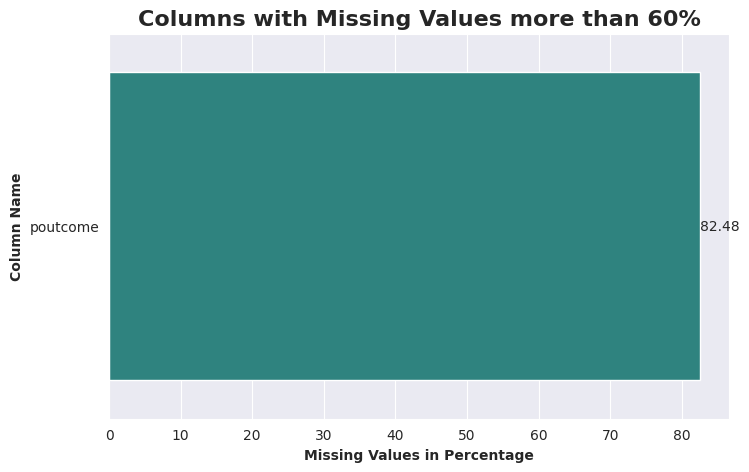

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 60], x="Missing Values in Percentage",y="Column Name",palette="viridis", hue="Column Name",legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 60%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

In [62]:
#since poutcome has more than 80% missing value it will not contribute to our model,so dropping the col
df = df.drop(columns=['poutcome'],axis=1)

In [63]:
freqgrph=df.select_dtypes(include=['float','int'])

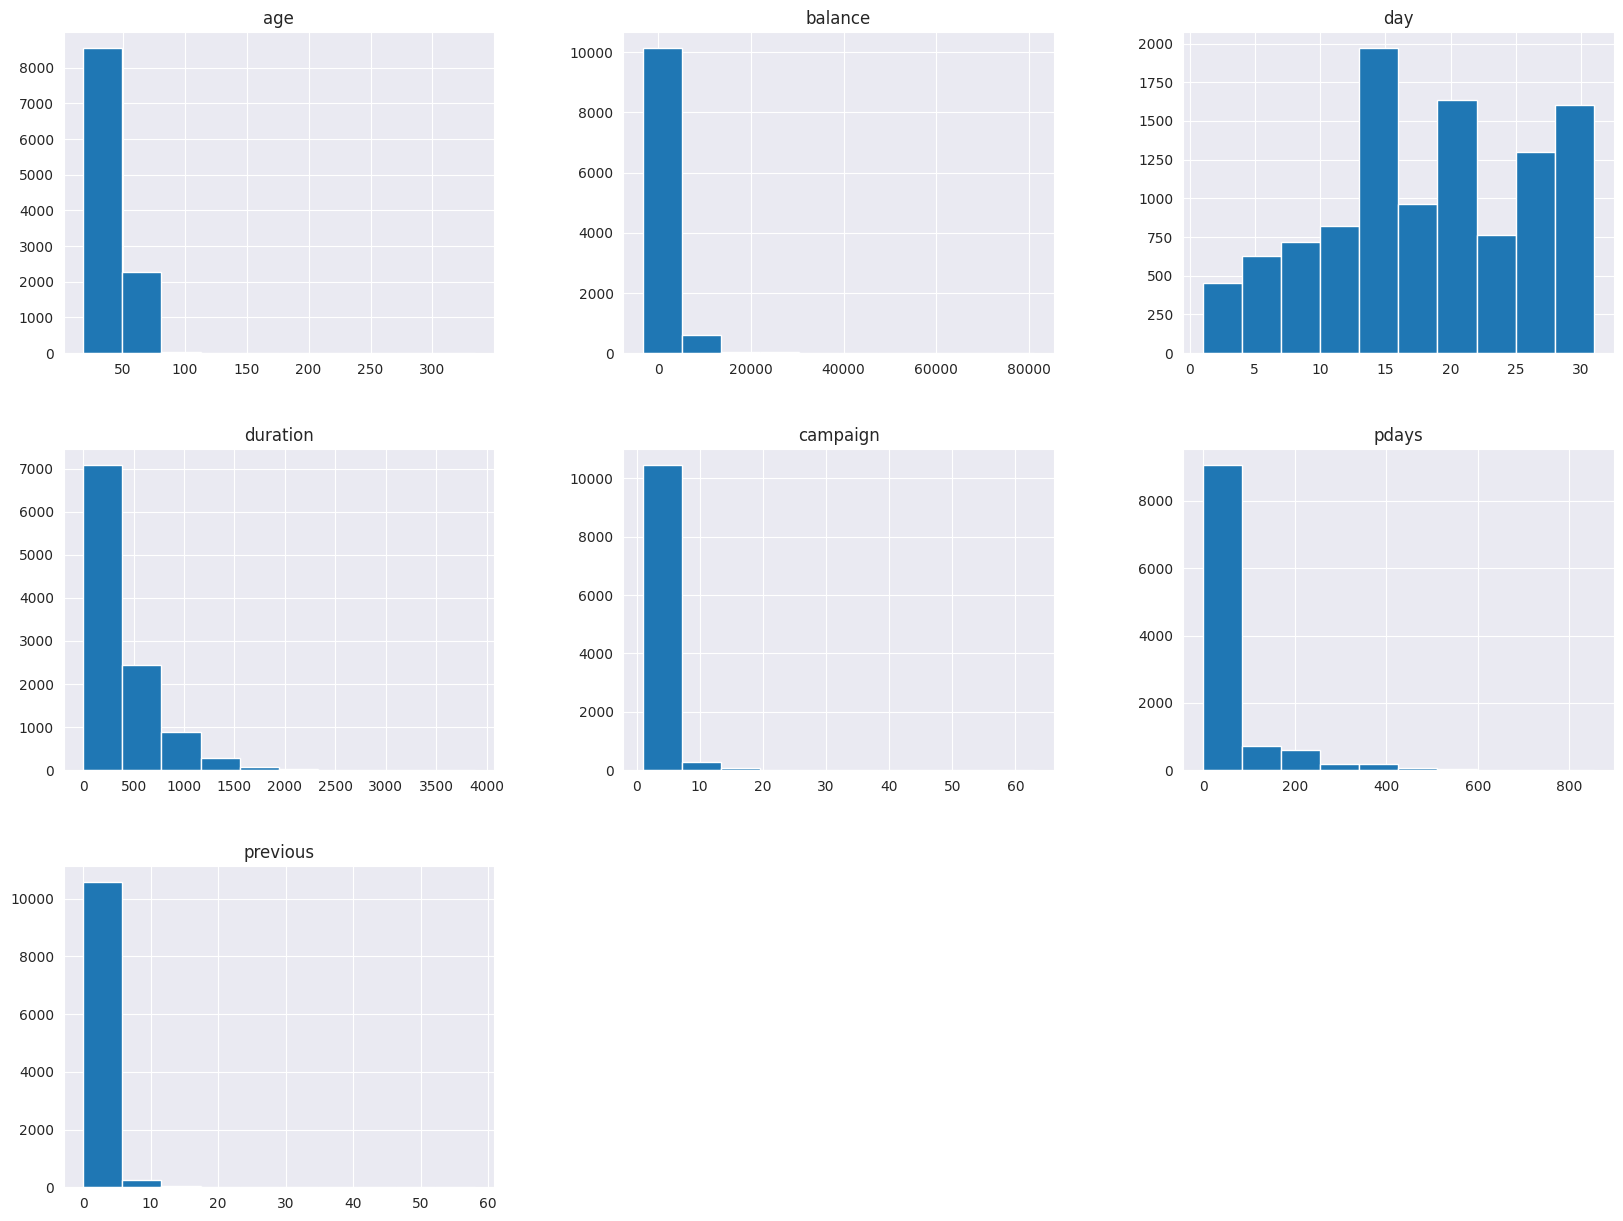

In [64]:
freqgrph.hist(figsize=(20,15))
plt.show()

In [65]:
#Most of the columns are skewed. We are using median to replacing the missing values here.
missing_val_col_num=['balance','day','duration','pdays']
for col in missing_val_col_num:
       df[col]=df[col].fillna(df[col].median())

In [66]:
#We are using mode to replacing the missing values in object columns.
missing_val_col_obj=['job','education','loan','contact']
for col in missing_val_col_obj:
       df[col]=df[col].fillna(df[col].mode()[0])

In [67]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# Cheaking and Handling Outliers

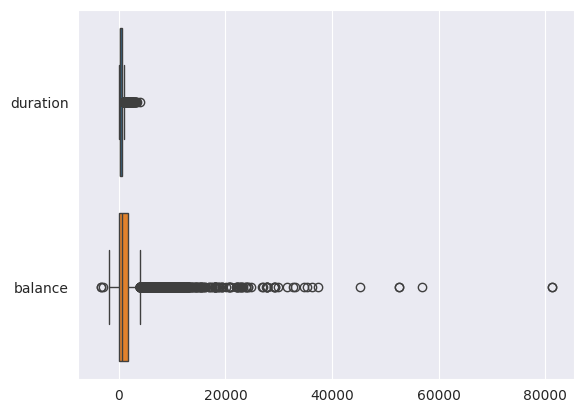

In [68]:
sns.boxplot(df[['duration','balance']] ,orient= "h")
plt.show()#Boxplot to check outliers of columns with large unique values

In [69]:
large_unique_col=['duration','balance']

In [70]:
from collections import defaultdict
for col in large_unique_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers= ((df[col] < lower_bound) | (df[col] > upper_bound))
    df[col] = df[col].where(~outliers, np.median(df[col]))
    #replacing outliers with median

# Encoding

In [71]:
data=df.copy()

In [72]:
categorical_columns = data.select_dtypes(include= object).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')

In [73]:
for cols in categorical_columns:
    print(f"{cols} : \n {data[cols].unique()} \n")

job : 
 ['admin.' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'student'] 

marital : 
 ['married' 'single' 'divorced'] 

education : 
 ['secondary' 'tertiary' 'primary'] 

default : 
 ['no' 'yes'] 

housing : 
 ['yes' 'no'] 

loan : 
 ['no' 'yes'] 

contact : 
 ['cellular' 'telephone'] 

month : 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

y : 
 ['yes' 'no'] 



In [74]:
status_mapping = {
    'married': 0,
    'single': 1,
    'divorced': 2
}
data['marital']=data['marital'].map(status_mapping)

In [75]:
education_mapping = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2
}
data['education']=data['education'].map(education_mapping)

In [76]:
default_mapping = {
    'no': 0,
    'yes': 1
}
data['default']=data['default'].map(default_mapping)

In [77]:
data['loan']=data['loan'].map(default_mapping)

In [78]:
data['housing']=data['housing'].map(default_mapping)

In [79]:
data['y']=data['y'].map(default_mapping)


In [80]:
contact_mapping = {
    'cellular': 0,
    'telephone': 1
}
data['contact']=data['contact'].map(contact_mapping)

In [81]:
month_mapping = {'jan': 1, 'feb': 2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11, 'dec': 12}
data['month'] = data['month'].map(month_mapping)

In [82]:
# Frequency encoding
frequency_encoding = data['job'].value_counts()
data['job'] = data['job'].map(frequency_encoding)

In [83]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

In [84]:
data.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,int64
balance,float64
housing,int64
loan,int64
contact,int64
day,float64


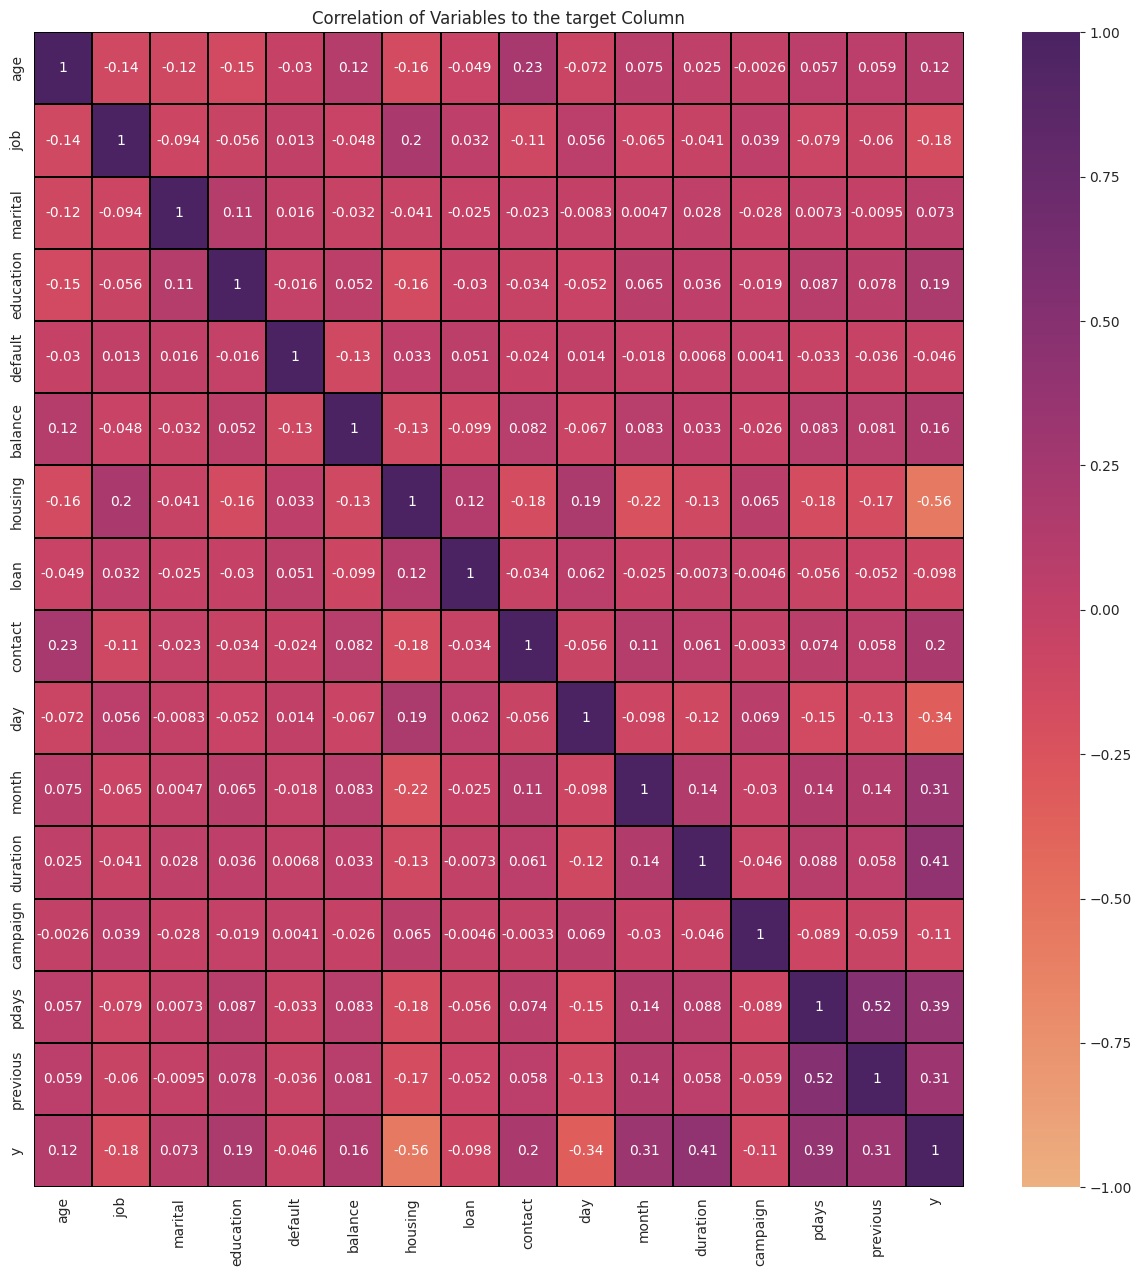

In [85]:
plt.figure(figsize=(15,15))
corr=data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y']].corr()
sns.heatmap(corr,annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the target Column')
plt.show()#Finding the correlation of all the variables with the target column

# Scaling

In [86]:
#splitting dataset into features and targets
x=data.drop(columns=['y'])
y=data['y']

In [87]:
#applying min mxa scaling on numerical cols
x1=x.copy()

In [88]:
#dropping the encoded cols from x1
x1.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'],axis=1,inplace=True)

In [89]:
x1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [90]:
#doing min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1=scaler.fit_transform(x1)

In [91]:
#we have to convert this array into dataframe
x1=pd.DataFrame(x1,columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

In [92]:
#merging this scaled data
x2=x.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],axis=1)
x=pd.concat([x1,x2],axis=1)
x.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month
0,0.129747,0.731445,0.133333,0.259690,0.000000,0.0,0.0,1317,0,1,0,1,0,0,5
1,0.120253,0.339362,0.133333,0.259690,0.000000,0.0,0.0,1317,0,1,0,0,0,0,5
2,0.072785,0.548371,0.133333,0.259690,0.000000,0.0,0.0,1718,0,1,0,1,0,0,5
3,0.117089,0.754138,0.133333,0.561047,0.000000,0.0,0.0,997,0,1,0,1,0,0,5
4,0.113924,0.363078,0.133333,0.652132,0.016129,0.0,0.0,1317,0,2,0,0,0,0,5


In [93]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic Regression Model

In [94]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)

In [95]:
model=lg.fit(x_train,y_train)

In [96]:
y_pred_lg=lg.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

In [98]:
print('Accuracy',accuracy_score(y_test,y_pred_lg))
print('precision',precision_score(y_test,y_pred_lg))
print('recall score',recall_score(y_test,y_pred_lg))

Accuracy 0.878969167050161
precision 0.8919722497522299
recall score 0.8538899430740038


# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))

Accuracy is  0.9512195121951219
precision 0.9471698113207547
recall score 0.952561669829222


# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred1=rf_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred1))
print('precision',precision_score(y_test,y_pred1))
print('recall score',recall_score(y_test,y_pred1))

Accuracy is  0.9710078232857801
precision 0.9872173058013766
recall score 0.952561669829222


In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1106   13]
 [  50 1004]]


In [105]:
#since True positive and True negative values are high we can assume that the model is not overfitted and is a good model with an accuracy of 97%

In [103]:
#hyperparameter tuning
rf_clf1=RandomForestClassifier(random_state=42,n_estimators=550,
    max_depth=10,
    max_features='sqrt',
    bootstrap=True)
rf_clf1.fit(x_train,y_train)
y_pred2=rf_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred2))
print('precision',precision_score(y_test,y_pred2))
print('recall score',recall_score(y_test,y_pred2))

Accuracy is  0.9710078232857801
precision 0.9872173058013766
recall score 0.952561669829222


In [104]:
#Even after Hyperparameter tuning there is no change in the accuracy.
#so we are proceeding with Random Forest Classifier to predict the output.